1. Solve a two variable linear equation such as - y=mx+c.
   Train the model with the following values of x, y-
   6= 3m + c
   8= 5m + c
   and Predict the value of y for x=10

In [2]:
import numpy as np
y=[6,8]
x=[3,5]

m=(y[1]-y[0])/(x[1]-x[0])
c=y[1]-m*x[1]

model = np.array([m,c])
y_pred=model.dot([10,1])

In [45]:
#eliminate variables top to down
def eliminate(E):
    for i in range(len(E)):
        for j in range(i+1,len(E)):
            multiple = E[j][i]/E[i][i]
            for k in range(0,len(E[i])):
                d=E[i][k]*multiple
                E[j][k]-=d
    return E

#solve eliminated down to up
def solve_eliminated(E):
    solution = [0 for n in range(len(E))]
    k=len(E[0]) - 2 
    for i in range (len(E)-1, -1,-1):  
        row = E[i] 
        y=row[-1]
        sm=0
        for kk in range(k+1, len(row) -1): 
            sm+=solution[kk]*row[kk] 
        soln=(y-sm)/row[k] 
        solution[i]=soln
        k-=1
    return solution

def solve(E):
    E = eliminate(E)
    return solve_eliminated(E)


In [46]:
#testing
eqns = [
    [1, 1, 1, 35],
    [3, 2, 1, 75],
    [4, 3, 1, 105]
   ]
solve(eqns)


[10.0, 20.0, 5.0]

3. Solve a quadratic equation such as y=ax+bx**2+c 
a) for x =1, the equation is a + b + c = 6 
b) for x=2, the equation is 4a + 2b + c = 12 
b) for x=23, the equation is 9a + 3b + c = 20

Exercise:
     - Generate the non linear dataset: y = 4*x^2 + 3x - 100 + noise
     - Now, model is y = ax ** 2 + bx + c
     - Write your error(a, b, c, X, y)
     - gradient descent to find a, b, c

In [191]:
import numpy as np
X=np.random.choice(range(5), size=(5, 1), replace=False)
Y = 4*(X**2) + 3*X - 100 +.3*np.random.randn(5, 1)
print(X,Y)

[[2]
 [0]
 [3]
 [1]
 [4]] [[-77.58939544]
 [-99.59663514]
 [-55.10022218]
 [-93.15073337]
 [-23.72766419]]


In [277]:
def diff_param(fn, param_idx,*args):
    delta = 0.000000000001
    r1=fn(*args)
    args=list(args)
    args[param_idx]+=delta
    r2=fn(*args)
    diff = (r2-r1)/delta
    return diff

def error(a,b,c,X,Y):
    # weights=np.array([a,b,c]
    # Xs=[X*X,X,1]
    # Y_pred= weights * Xs
    Y_pred=a*(X**2) + b*X + c
   
    e = (Y - Y_pred)**2
    return np.sum(e)

In [287]:
X=2*np.random.random((100, 1))
Y = 4*(X**2) + 3*X - 10 +.3*np.random.randn(100, 1)


a,b,c=10,10,10
As=[]
Bs=[]
Cs=[]

errors = []
lr=.001
# print(a,b,c)

# print(f"weights: {weights}")
for i in range(1000):
    weights=np.array([a,b,c])
    args=[a,b,c,X,Y]
    new_error = error(*args)
    errors.append(new_error)
    As.append(a)
    Bs.append(b)
    Cs.append(c)
    de_da=diff_param(error,0,*args)
    de_db=diff_param(error,1,*args)
    de_dc=diff_param(error,2,*args)

    a-= lr*de_da
    b-= lr*de_db
    c-= lr*de_dc
    
print(f"Last Error: {new_error} with weights: {weights}")
# Error: 256.2535932467451 with weights: [  7.70960812 -14.01299071 -86.76875834]

Last Error: 9.612756281200841 with weights: [ 4.30802688  2.41124016 -9.80603592]


In [290]:
np.max(X)

np.float64(1.9314709572729505)

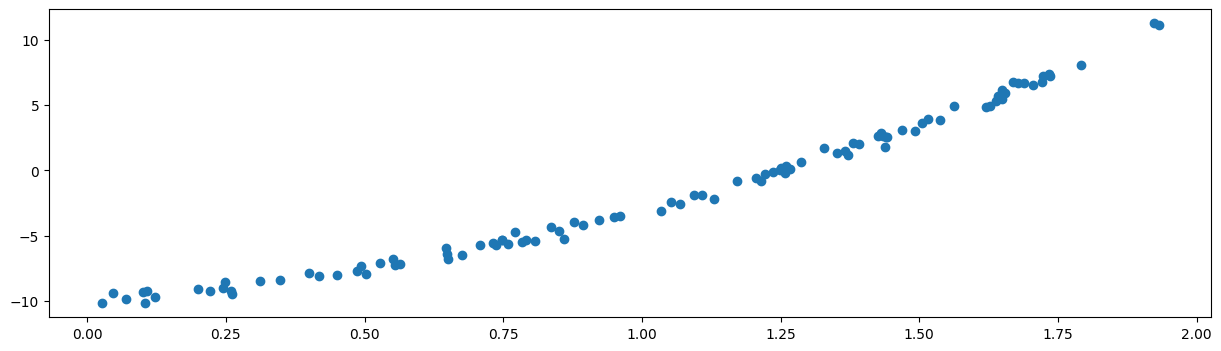

In [294]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,4))
plt.scatter(X, Y)
plt.show()

In [222]:
x=np.array([[1],[2],[3]])
y=np.array([[6],[9],[10]])
a,b,c=2,4,5
args=[a,b,c,x,y]
print(args)
de_da=diff_param(error,0,*args)
de_db=diff_param(error,1,*args)
de_dc=diff_param(error,2,*args)
print(de_da,de_db,de_dc)
lr=.001
a-= lr*de_da
b-= lr*de_db
c-= lr*de_dc
args=[a,b,c,x,y]
de_da=diff_param(error,0,*args)
de_db=diff_param(error,1,*args)
de_dc=diff_param(error,2,*args)
print(de_da,de_db,de_dc)

[2, 4, 5, array([[1],
       [2],
       [3]]), array([[ 6],
       [ 9],
       [10]])]
[556.15601013] [207.93322619] [84.12825991]
[429.79309001] [161.09424905] [65.48361853]


In [300]:
x = np.array([4,5,6])
y = np.array([7,8, 9])
a, b, c = 1,2,3
args=[a,b,c,x,y]
Y_pred=a*(x**2) + b*x + c
e = (y - Y_pred)**2
print(Y_pred)
# print(e)
# r=np.sum(e)
# print(r)
print("_____________")
# weights=np.array([[a],[b],[c]])
# Xs=[x*x,x,np.ones_like(x)]
# print(Xs)
# print(weights)
#     # Y_pred=a*(X**2) + b*X + c
# Y_pred= weights * Xs
# # e = (y - Y_pred)**2
# print(Y_pred)
# # print(e)
# # r=np.sum(e)
# # print(r)

[27 38 51]
_____________


In [247]:
x=np.array([[1],[2],[3]])
y=np.array([[6],[9],[10]])
a,b,c=2,4,5
args=[a,b,c,x,y]
r=error(*args)
print(r)

794


In [227]:
v=np.array([1,2,3])
Vs=[v*v, v, 1]

In [225]:
Vs

[array([1, 4, 9]), array([1, 2, 3]), 1]

In [183]:
a,b,c=2,4,5

In [257]:
x=np.array([1,2,3])
y=np.array([6,9,10])
a,b,c=2,4,5
weights=np.array([a,b,c])
Xs=[x*x,x,1]
print(Xs)
print(weights)
r=weights*Xs

[array([1, 4, 9]), array([1, 2, 3]), 1]
[2 4 5]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [301]:
x = np.array([4,5,6])
y = np.array([7,8, 9])
a, b, c = 1,2,3
ws = np.array([a, b, c])
X = np.array([x*x, x, np.ones_like(x)])
print(f"ws:{ws}")
print(f"X:{X}")
ypred = ws@X
print(f"ypred:{ypred}")

ws:[1 2 3]
X:[[16 25 36]
 [ 4  5  6]
 [ 1  1  1]]
ypred:[27 38 51]


In [187]:
X.shape

(3,)

In [188]:
l=X*X

In [189]:
l.shape

(3,)